In [1]:
from numqt import *

In [19]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Characteristic length along x
Ly = 1 # Characteristic length along y
Lz = 1 # Characteristic length along z

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1 # reduced Plack constant 
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency
wy = hbar / (m * Ly**2) # y confinement frequency
wz = hbar / (m * Lz**2) # z confinement frequency

#-----------------------------------------------------------
# Creating operators
#-----------------------------------------------------------
Nx_states = 30 # Number of states to include
Ny_states = 30 # Number of states to include
Nz_states = 30 # Number of states to include

bosonic_ops = bos_ops(dimx = Nx_states, dimy = Ny_states, dimz = Nz_states) # Obtaining bosonic operators
a_x, ad_x = bosonic_ops["x"] # Extracting bosonic operators
a_y, ad_y = bosonic_ops["y"] # Extracting bosonic operators
a_z, ad_z = bosonic_ops["z"] # Extracting bosonic operators


px = bos_p(a_x, ad_x, omega = wx, mass = m, hbar = hbar) # momentum operator as fn of a, ad
x = bos_x(a_x, ad_x, omega = wx, mass = m, hbar = hbar) # position operator as fn of a, ad
py = bos_p(a_y, ad_y, omega = wy, mass = m, hbar = hbar) # momentum operator as fn of a, ad
y = bos_x(a_y, ad_y, omega = wy, mass = m, hbar = hbar) # position operator as fn of a, ad
pz = bos_p(a_z, ad_z, omega = wz, mass = m, hbar = hbar) # momentum operator as fn of a, ad
z = bos_x(a_z, ad_z, omega = wz, mass = m, hbar = hbar) # position operator as fn of a, ad

In [20]:
H = (px@px + py@py + pz@pz) / (2*m) + 0.5 * m *(wx**2 * x@x + wy**2 * y@y + wz**2 * z@z)
H = Hamiltonian(H)
H.H

<Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 27000 stored elements and shape (27000, 27000)>

In [21]:
k = 120
energies, wavefunctions = H.solve(k)

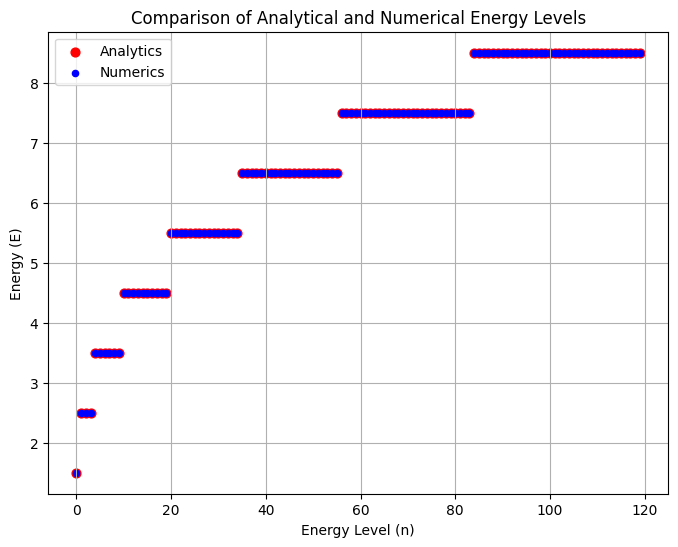

In [22]:
# Define the analytical energy function
def energy(nx, ny, nz):
    return hbar * wx * (nx + 0.5) + hbar * wy * (ny + 0.5) + hbar * wz * (nz + 0.5)

# Generate analytical energy levels
analytical_energies = sorted([energy(nx, ny, nz) for nx in range(Nx_states) for ny in range(Nx_states) for nz in range(Nz_states)])[:k]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(k), analytical_energies, c="r", s=40, label="Analytics")
plt.scatter(range(k), energies, c="b", s=20, label="Numerics")
plt.legend()
plt.ylabel("Energy (E)")
plt.xlabel("Energy Level (n)")
plt.title("Comparison of Analytical and Numerical Energy Levels")
plt.grid(True)

plt.show()

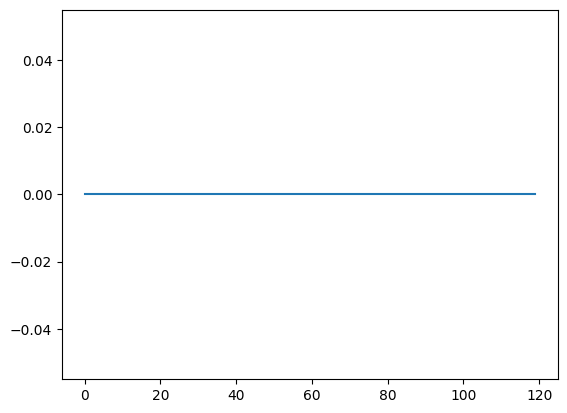

In [23]:
plt.plot(range(k), analytical_energies - np.array(sorted(energies)).round(4))